In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def take_and_clean(filename, keyword, print_info=False):
    raw = pd.read_json(f'./data/giantsGates/{filename}.json')
    ranks = raw[['creatorName', 'totalScore']]
    ranks = ranks[ranks['creatorName'].str.contains(keyword)]
    ranks = ranks[ranks['creatorName'].str.contains('GG')]
    if print_info:
        ranks.info()
    return ranks


In [3]:
NAMES = ['MUN', 'THR', 'OGR', 'SHM', 'BRW', 'WRL']

def collect_scores(ranks, col_names=NAMES):
    by_units = []
    for name in col_names:
        units = ranks[ranks['creatorName'].str.contains(name)]['totalScore'] * 100
        units.reset_index(drop=True, inplace=True)
        by_units.append(units)

    unit_scores = pd.concat(by_units,
        ignore_index=True, axis=1)
    unit_scores.columns = col_names
    return unit_scores


def print_score_data(unit_scores):
    result = []
    for name in unit_scores.columns:
        units = unit_scores[name]
        result.append([name, units.mean(), units.median()])

    result.sort(key=lambda x: x[1], reverse=True)
    print('NAME -- MEAN   --   MED')
    for line in result:
        print(f'{line[0]} -- {line[1]: <7.2f} -- {line[2]:.2f}')

def boxplot_score(unit_scores, vert_size=6):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(16, vert_size))
    sns.boxplot(data=unit_scores)

NAME -- MEAN   --   MED
WRL -- 2494.59 -- 2480.29
SHM -- 1364.82 -- 1203.23
THR -- 793.56  -- 789.42
BRW -- 567.39  -- 620.46
MUN -- 374.26  -- 516.49
OGR -- 10.07   -- -37.20


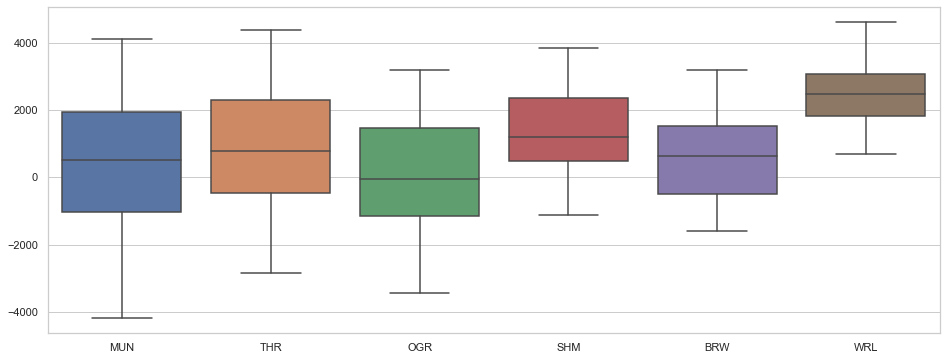

In [4]:
# Version 0.8.23
# team by 3
# C point without assault
front_team3_v0 = take_and_clean('rankingsC', '-C-', False)
front_team3_v0_scores = collect_scores(front_team3_v0)
print_score_data(front_team3_v0_scores)
boxplot_score(front_team3_v0_scores)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 56 to 273
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   creatorName  216 non-null    object 
 1   totalScore   216 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB
NAME -- MEAN   --   MED
WRL -- 2167.11 -- 2182.07
SHM -- 1300.05 -- 1322.52
BRW -- 1281.19 -- 1365.39
THR -- 796.32  -- 1159.64
OGR -- 608.93  -- 1174.93
MUN -- 228.45  -- 777.71


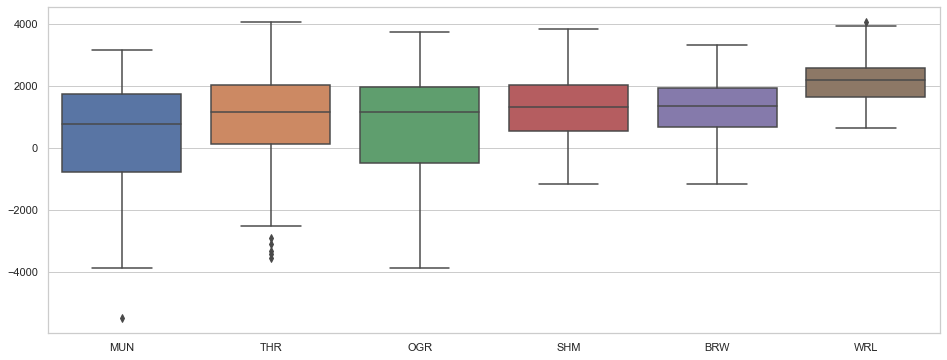

In [5]:
# Version 0.8.23.a
# team by 3
# ALT point with assault
front_team3_v0 = take_and_clean('rankingsV23A', 'V23A', True)
front_team3_v0_scores = collect_scores(front_team3_v0)
print_score_data(front_team3_v0_scores)
boxplot_score(front_team3_v0_scores, 6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 53 to 303
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   creatorName  216 non-null    object 
 1   totalScore   216 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB
NAME -- MEAN   --   MED
SHM -- 1758.37 -- 1779.49
BRW -- 1301.92 -- 1360.07
WRL -- 1295.20 -- 1277.73
OGR -- 1242.67 -- 1354.67
THR -- 1219.35 -- 1448.76
MUN -- 1050.17 -- 1239.13


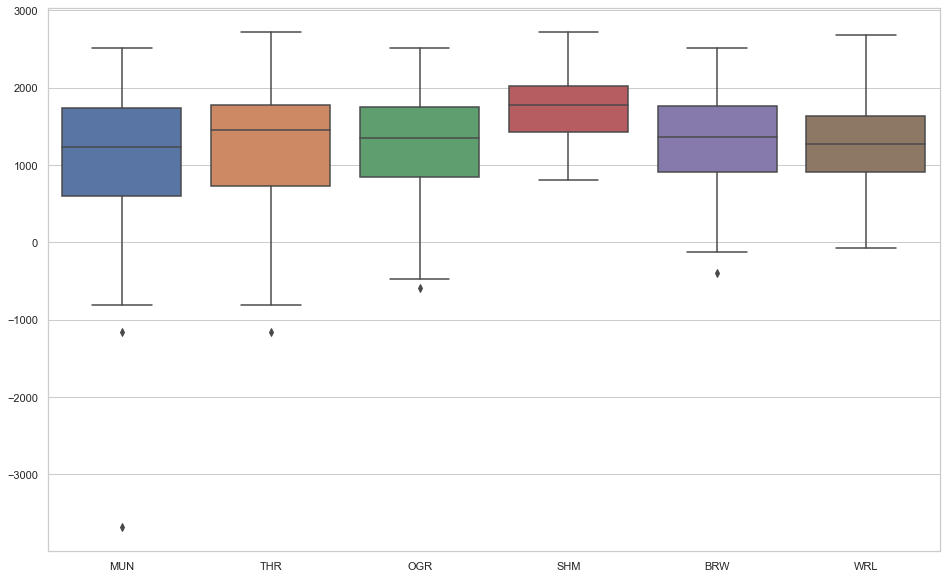

In [6]:
# Version 0.8.23.h
# team by 3
# ALT point with assault
# shaman maxHealth: 100 -> 105
front_team = take_and_clean('rankings23H3', '23H3', True)
front_team_scores = collect_scores(front_team)
print_score_data(front_team_scores)
boxplot_score(front_team_scores, 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1298
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   creatorName  1296 non-null   object 
 1   totalScore   1296 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.4+ KB
NAME -- MEAN   --   MED
SHM -- 2332.64 -- 2355.93
OGR -- 2223.62 -- 2260.25
THR -- 2217.23 -- 2268.75
WRL -- 2216.58 -- 2230.28
BRW -- 2144.06 -- 2206.29
MUN -- 2115.64 -- 2171.93


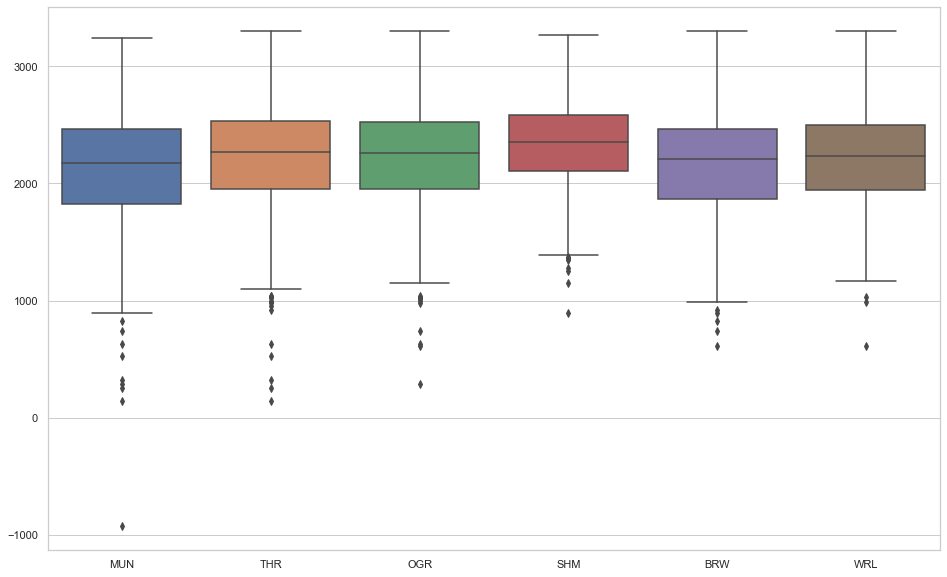

In [7]:
# Version 0.8.23.j
# team by 4
# ALT point with assault
# shaman maxHealth: 100 -> 105
front_team = take_and_clean('rankings23J4', '23J4', True)
front_team_scores = collect_scores(front_team)
print_score_data(front_team_scores)
boxplot_score(front_team_scores, 10)

In [8]:
def collect_pairs_scores(ranks):
    columns = []
    result = []
    for i, n1 in enumerate(NAMES):
        for n2 in NAMES[i+1:]:
            columns.append(f'{n1}-{n2}')
            pairs = ranks[(ranks['creatorName'].str.contains(n1)) 
                  & (ranks['creatorName'].str.contains(n2))]['totalScore'] * 100
            pairs.reset_index(drop=True, inplace=True)
            result.append(pairs)

    result_df = pd.concat(result,
        ignore_index=True, axis=1)
    result_df.columns = columns
    return result_df


NAME -- MEAN   --   MED
THR-SHM -- 2399.89 -- 2424.95
OGR-SHM -- 2377.88 -- 2379.55
SHM-WRL -- 2323.73 -- 2332.62
THR-WRL -- 2309.96 -- 2327.44
MUN-SHM -- 2301.41 -- 2328.38
OGR-WRL -- 2275.03 -- 2285.00
THR-OGR -- 2239.98 -- 2275.03
SHM-BRW -- 2230.64 -- 2258.88
OGR-BRW -- 2207.42 -- 2248.39
MUN-WRL -- 2172.09 -- 2177.47
THR-BRW -- 2169.69 -- 2228.99
MUN-OGR -- 2132.00 -- 2164.65
BRW-WRL -- 2104.90 -- 2095.93
MUN-THR -- 2098.01 -- 2160.86
MUN-BRW -- 2093.91 -- 2159.17


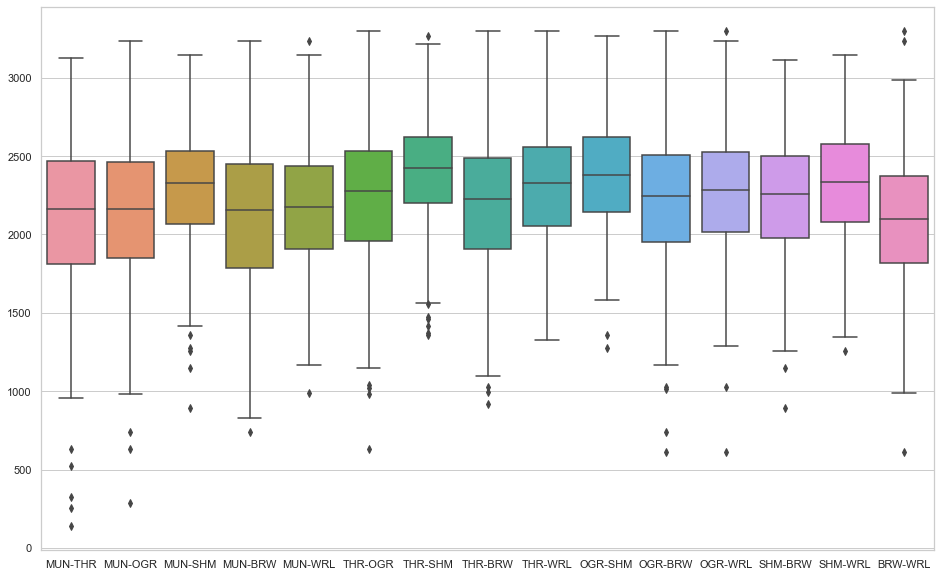

In [9]:
ladder_result = take_and_clean('rankings23J4', '23J4')
pairs_scores = collect_pairs_scores(ladder_result)
print_score_data(pairs_scores)
boxplot_score(pairs_scores, 10)
# pairs_scores

NAME -- MEAN   --   MED
SHM -- 2057.05 -- 2088.86
WRL -- 1980.62 -- 2005.88
THR -- 1968.97 -- 2037.09
OGR -- 1963.92 -- 2020.65
BRW -- 1949.76 -- 2032.16
MUN -- 1841.28 -- 1917.33
NAME -- MEAN   --   MED
THR-SHM -- 2128.95 -- 2147.29
THR-WRL -- 2101.52 -- 2117.35
OGR-SHM -- 2097.62 -- 2108.05
SHM-WRL -- 2055.81 -- 2085.37
OGR-WRL -- 2045.38 -- 2088.46
OGR-BRW -- 2016.41 -- 2076.18
SHM-BRW -- 2015.44 -- 2095.12
MUN-SHM -- 2001.92 -- 2035.58
THR-BRW -- 2001.77 -- 2101.65
THR-OGR -- 1972.66 -- 2006.47
MUN-WRL -- 1928.08 -- 1925.16
MUN-BRW -- 1902.20 -- 1985.42
BRW-WRL -- 1889.86 -- 1923.02
MUN-OGR -- 1850.61 -- 1929.03
MUN-THR -- 1826.73 -- 1891.06


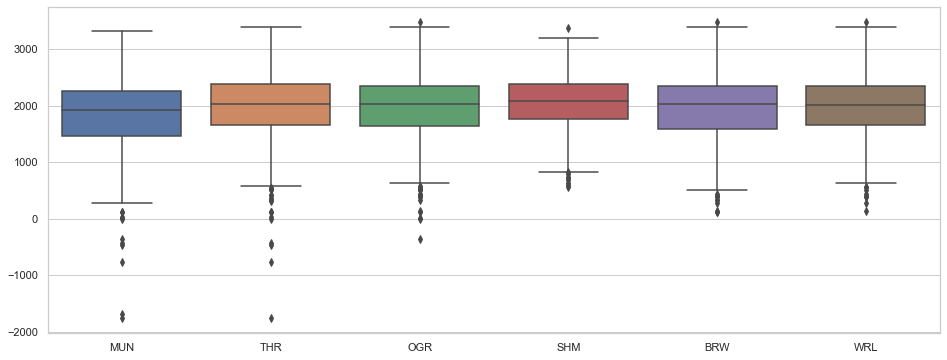

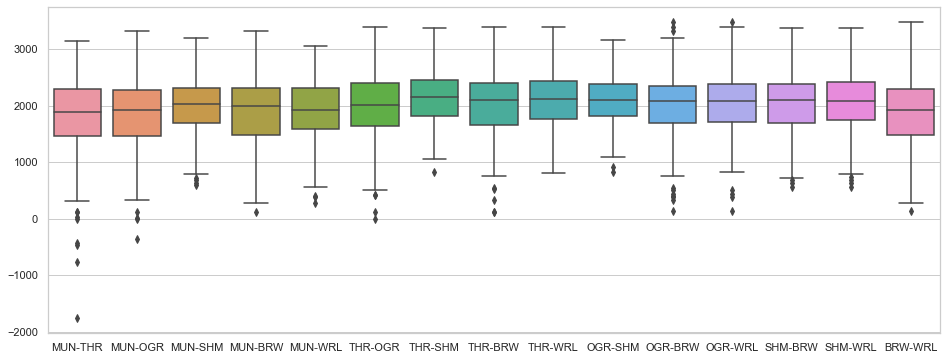

In [10]:
# Version 0.8.24.б
# team by 4
# ALT point with assault
# brawler
# attackDamage 50 => 52
# shaman
# attackDamage 23 => 22
ladder_result = take_and_clean('rankings24B4', '24B4')
unit_scores = collect_scores(ladder_result)
print_score_data(unit_scores)
boxplot_score(unit_scores, 6)

pairs_scores = collect_pairs_scores(ladder_result)
print_score_data(pairs_scores)
boxplot_score(pairs_scores, 6)


NAME -- MEAN   --   MED
PTOP- -- 2328.92 -- 2256.81
FTOP- -- 2311.31 -- 2297.90
PBOT- -- 2284.88 -- 2207.14
FBOT- -- 2267.67 -- 2295.80
FALTP- -- 1615.19 -- 1512.00
PALTP- -- 1585.89 -- 1561.55
FALT- -- 1339.26 -- 1325.94
PALT- -- 1153.08 -- 1142.35


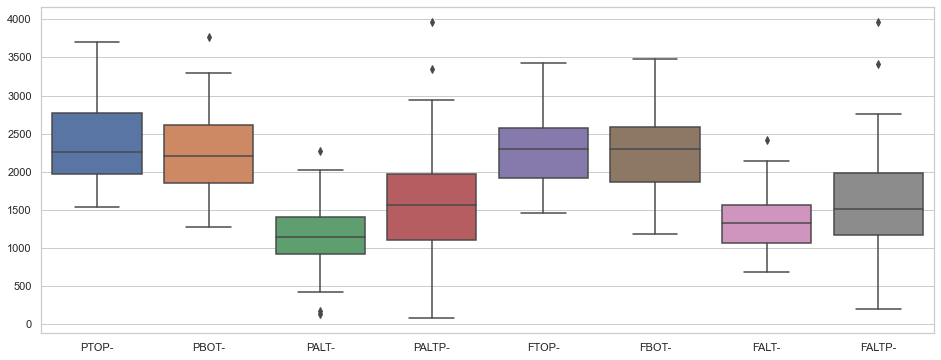

In [11]:
PLACE_TACTICS = [
    "PTOP-",
    "PBOT-",
    "PALT-",
    "PALTP-",
    "FTOP-",
    "FBOT-",
    "FALT-",
    "FALTP-"]
ladder_result = take_and_clean('rankings824NB', '824NB')
place_scores = collect_scores(ladder_result, PLACE_TACTICS)
print_score_data(place_scores)
boxplot_score(place_scores, 6)

<AxesSubplot:>

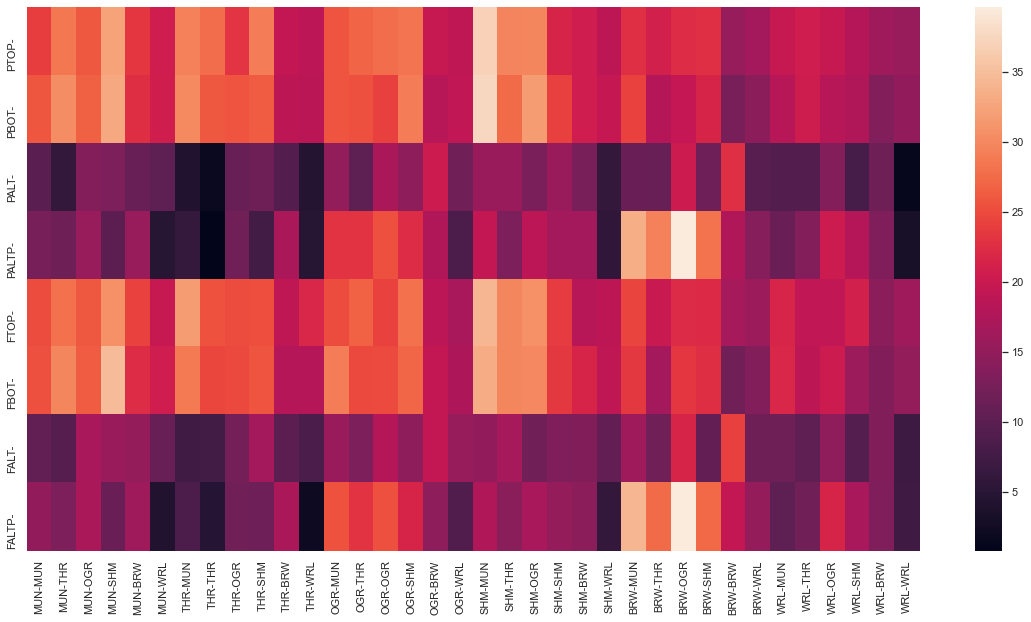

In [12]:
name_pairs = [f'{n1}-{n2}' for n1 in NAMES for n2 in NAMES]
df = pd.DataFrame(columns=PLACE_TACTICS)
for np in name_pairs:
    line = {}
    for pt in PLACE_TACTICS:
        res = ladder_result[ladder_result['creatorName'].str.contains(np) &
                            ladder_result['creatorName'].str.contains(pt)]
        line[pt] = res.iloc[0, 1]
    df.loc[np] = line

plt.figure(figsize=(20, 10))
# sns.color_palette('tab10')
sns.heatmap(df.transpose())

NAME -- MEAN   --   MED
WRL -- 1596.39 -- 1575.58
SHM -- 1530.06 -- 1547.19
THR -- 1420.76 -- 1540.21
BRW -- 1399.15 -- 1426.40
OGR -- 1295.69 -- 1329.87
MUN -- 1282.95 -- 1377.71
NAME -- MEAN   --   MED
THR-SHM -- 1668.46 -- 1676.87
THR-WRL -- 1647.87 -- 1626.41
MUN-WRL -- 1630.51 -- 1649.04
OGR-WRL -- 1568.00 -- 1536.17
SHM-BRW -- 1546.14 -- 1544.60
SHM-WRL -- 1533.24 -- 1529.08
OGR-SHM -- 1521.57 -- 1519.30
BRW-WRL -- 1501.88 -- 1472.79
MUN-SHM -- 1454.13 -- 1513.19
THR-BRW -- 1387.37 -- 1441.86
OGR-BRW -- 1329.52 -- 1293.92
MUN-BRW -- 1289.88 -- 1280.71
MUN-THR -- 1284.33 -- 1520.75
THR-OGR -- 1268.53 -- 1416.10
MUN-OGR -- 1040.92 -- 1182.71


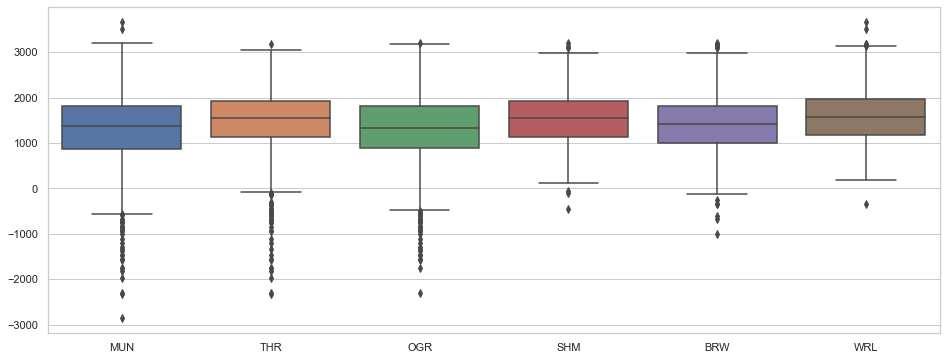

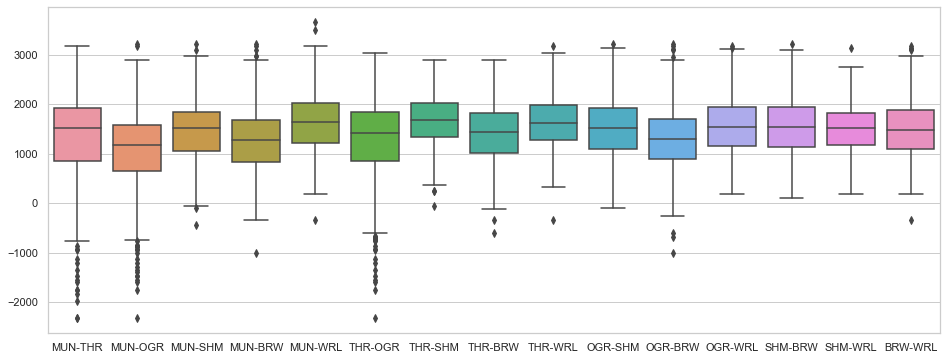

In [13]:
# Version 0.8.27.a
# team by 4
# TOP/BOT point with assault
# munchkin
# attackDamage +1
ladder_result = take_and_clean('rankings827NF', '827NF')
unit_scores = collect_scores(ladder_result)
print_score_data(unit_scores)
boxplot_score(unit_scores, 6)

pairs_scores = collect_pairs_scores(ladder_result)
print_score_data(pairs_scores)
boxplot_score(pairs_scores, 6)


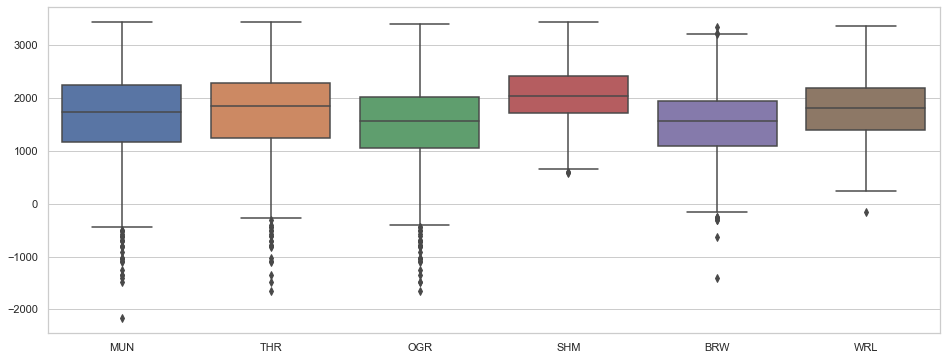

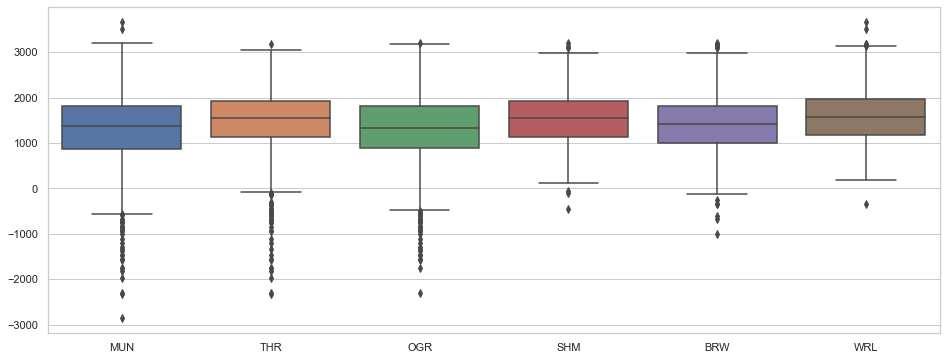

In [14]:
ladder_result = take_and_clean('rankings827NC', '827NC')
unit_scores = collect_scores(ladder_result)
# print_score_data(unit_scores)
boxplot_score(unit_scores, 6)
ladder_result = take_and_clean('rankings827NF', '827NF')
unit_scores = collect_scores(ladder_result)
# print_score_data(unit_scores)
boxplot_score(unit_scores, 6)

NAME -- MEAN   --   MED
BRW -- 2570.81 -- 2343.28
OGR -- 2242.03 -- 2163.45
THR -- 2043.13 -- 2122.94
MUN -- 2030.68 -- 1983.40
WRL -- 2027.12 -- 1932.18
SHM -- 1660.84 -- 1606.21
NAME -- MEAN   --   MED
MUN-BRW -- 2731.80 -- 2646.61
OGR-BRW -- 2588.22 -- 2220.67
THR-BRW -- 2520.25 -- 2387.31
SHM-BRW -- 2432.04 -- 2207.46
BRW-WRL -- 2393.63 -- 2159.15
THR-OGR -- 2257.16 -- 2205.93
OGR-WRL -- 2117.42 -- 2089.23
MUN-OGR -- 2100.41 -- 1994.35
MUN-WRL -- 2095.37 -- 2059.43
OGR-SHM -- 2092.33 -- 2112.17
THR-WRL -- 2083.72 -- 1924.46
MUN-THR -- 1996.81 -- 1929.20
SHM-WRL -- 1512.27 -- 1493.14
MUN-SHM -- 1469.85 -- 1591.30
THR-SHM -- 1206.97 -- 1316.98


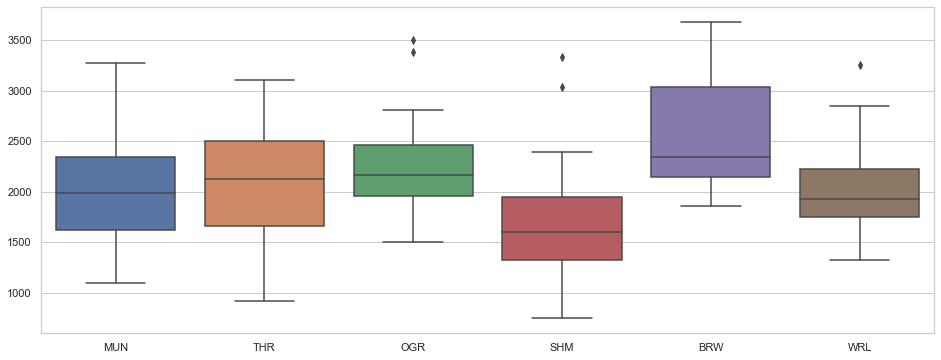

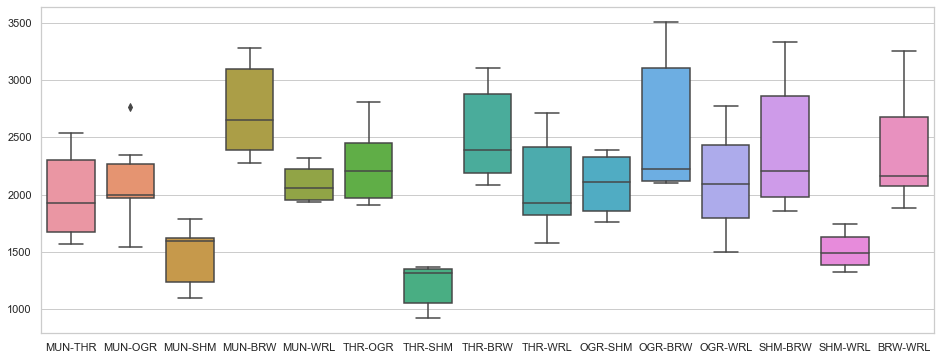

In [15]:
# Version 0.9.09a
# team by 2
# TOP/BOT/CEN point with assault
# munchkin
# attackDamage +1
ladder_result = take_and_clean('rankings909A', '909A')
unit_scores = collect_scores(ladder_result)
print_score_data(unit_scores)
boxplot_score(unit_scores, 6)

pairs_scores = collect_pairs_scores(ladder_result)
print_score_data(pairs_scores)
boxplot_score(pairs_scores, 6)


NAME -- MEAN   --   MED
THR -- 2592.79 -- 3115.71
SHM -- 1962.97 -- 1858.74
BRW -- 1935.11 -- 1773.11
MUN -- 1607.13 -- 1478.21
OGR -- 1537.25 -- 1474.70
WRL -- 1435.40 -- 1318.87
NAME -- MEAN   --   MED
THR-SHM -- 2756.14 -- 3150.86
THR-BRW -- 2733.86 -- 3110.43
MUN-THR -- 2460.10 -- 3147.38
THR-OGR -- 2366.33 -- 3032.98
THR-WRL -- 2249.06 -- 2858.19
SHM-BRW -- 2058.92 -- 1921.96
MUN-SHM -- 1759.99 -- 1782.94
MUN-BRW -- 1682.04 -- 1581.25
OGR-SHM -- 1648.26 -- 1586.24
OGR-BRW -- 1637.21 -- 1559.52
BRW-WRL -- 1543.67 -- 1484.34
SHM-WRL -- 1523.35 -- 1428.25
MUN-OGR -- 1212.29 -- 1020.55
MUN-WRL -- 1080.70 -- 955.05
OGR-WRL -- 1036.35 -- 938.11


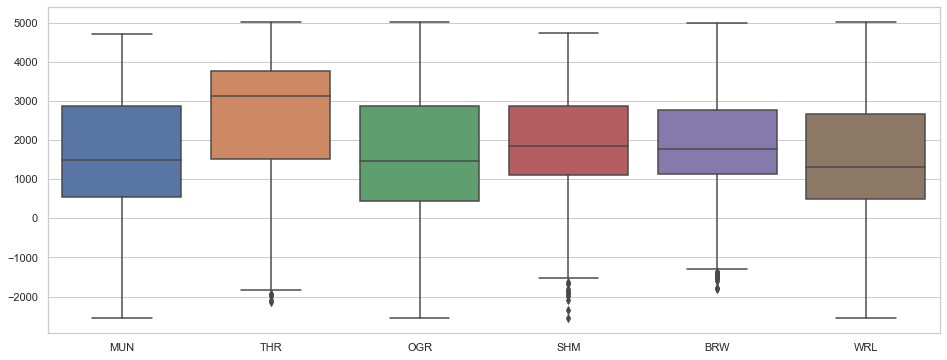

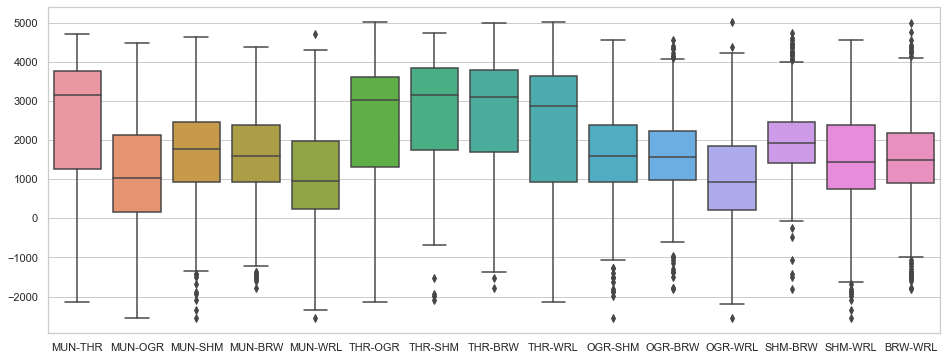

In [23]:
# Version 0.9.09B
# team by 2
# TOP/BOT/CEN point with assault
ladder_result = take_and_clean('rankingsG910B', 'G910B')
# ladder_result
unit_scores = collect_scores(ladder_result)
print_score_data(unit_scores)
boxplot_score(unit_scores, 6)

pairs_scores = collect_pairs_scores(ladder_result)
print_score_data(pairs_scores)
boxplot_score(pairs_scores, 6)


NAME -- MEAN   --   MED
THR -- 2957.45 -- 3653.80
SHM -- 2222.43 -- 2030.75
BRW -- 2084.16 -- 1490.99
MUN -- 1957.94 -- 1375.73
OGR -- 1905.48 -- 1416.21
WRL -- 1800.91 -- 1249.60
NAME -- MEAN   --   MED
THR-SHM -- 3058.59 -- 3591.23
THR-BRW -- 2976.40 -- 3722.90
MUN-THR -- 2854.15 -- 3615.58
THR-OGR -- 2777.47 -- 3556.54
THR-WRL -- 2696.04 -- 3248.56
SHM-BRW -- 2163.80 -- 1998.64
MUN-SHM -- 2098.68 -- 2115.15
OGR-SHM -- 1983.58 -- 1743.75
MUN-BRW -- 1844.62 -- 1337.56
OGR-BRW -- 1827.10 -- 1403.52
SHM-WRL -- 1790.08 -- 1339.71
BRW-WRL -- 1725.95 -- 1289.90
MUN-OGR -- 1635.60 -- 1084.11
MUN-WRL -- 1558.00 -- 986.63
OGR-WRL -- 1507.79 -- 1077.53


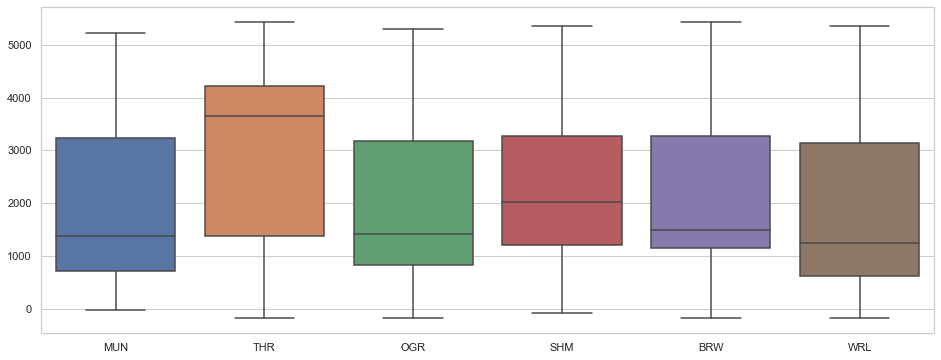

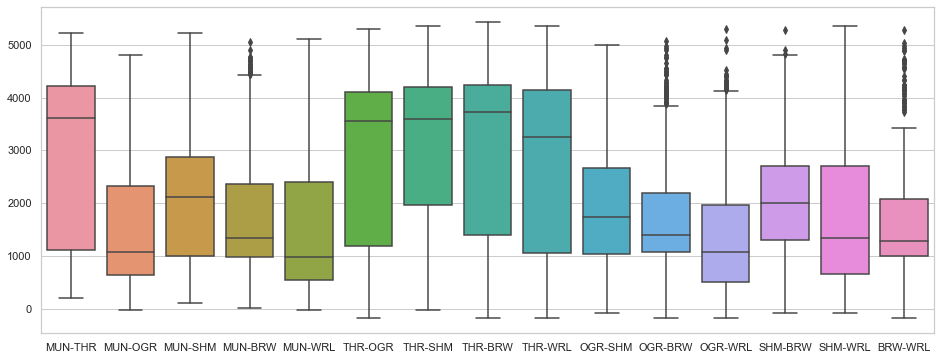

In [24]:
# Version 0.9.10c
# team by 4
ladder_result = take_and_clean('rankingsG910C', 'G910C')
# ladder_result
unit_scores = collect_scores(ladder_result)
print_score_data(unit_scores)
boxplot_score(unit_scores, 6)

pairs_scores = collect_pairs_scores(ladder_result)
print_score_data(pairs_scores)
boxplot_score(pairs_scores, 6)


NAME -- MEAN   --   MED
SHM -- 2219.49 -- 2305.46
THR -- 2061.97 -- 2147.22
BRW -- 2037.55 -- 2119.20
WRL -- 1941.14 -- 2019.75
MUN -- 1861.08 -- 2116.15
OGR -- 1769.11 -- 1837.33
NAME -- MEAN   --   MED
THR-SHM -- 2312.04 -- 2346.18
SHM-BRW -- 2310.90 -- 2355.46
MUN-SHM -- 2153.20 -- 2304.55
SHM-WRL -- 2146.98 -- 2200.63
THR-BRW -- 2088.16 -- 2114.45
OGR-SHM -- 2064.83 -- 2233.38
BRW-WRL -- 2033.03 -- 2129.34
THR-WRL -- 2028.57 -- 2096.55
MUN-THR -- 1998.32 -- 2210.04
MUN-BRW -- 1951.83 -- 2126.14
THR-OGR -- 1856.57 -- 1863.78
MUN-WRL -- 1839.35 -- 2071.28
OGR-BRW -- 1821.56 -- 1907.28
OGR-WRL -- 1732.45 -- 1744.60
MUN-OGR -- 1556.20 -- 1690.11


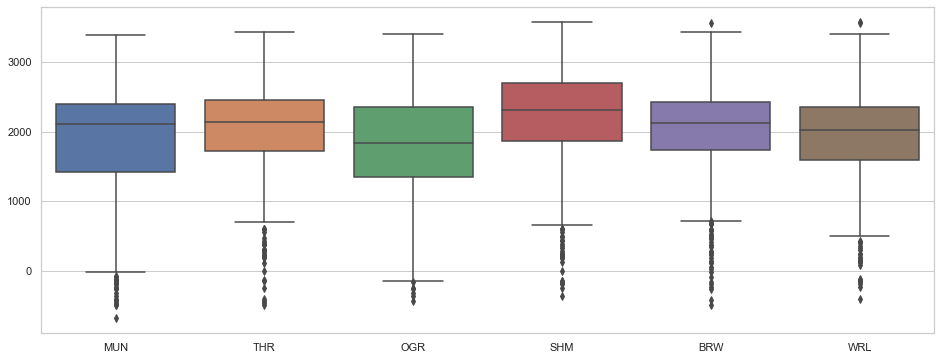

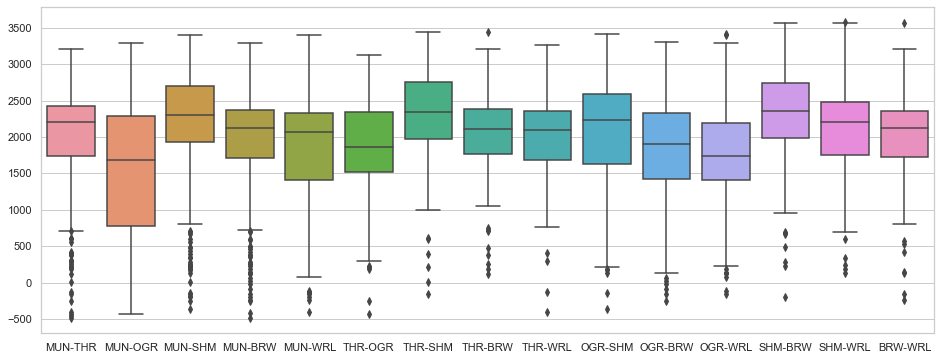

In [30]:
# Version 0.9.13c
# team by 4
ladder_result = take_and_clean('G914B', 'G914B')
# ladder_result
unit_scores = collect_scores(ladder_result)
print_score_data(unit_scores)
boxplot_score(unit_scores, 6)

pairs_scores = collect_pairs_scores(ladder_result)
print_score_data(pairs_scores)
boxplot_score(pairs_scores, 6)
